**Interpolacja**

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

**Zadanie 1.**

In [10]:
# Data
year = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537,  123202624, 132164569, 
                        151325798, 179323175, 203302031,  226542199])

# φ functions
phi_1 = np.vectorize(lambda t, j: np.double(t**(j-1)), excluded=['j'])
phi_2 = np.vectorize(lambda t, j: np.double((t-1900)**(j-1)), excluded=['j'])
phi_3 = np.vectorize(lambda t, j: np.double((t-1940)**(j-1)), excluded=['j'])
phi_4 = np.vectorize(lambda t, j: np.double(((t-1940)/40)**(j-1)), excluded=['j'])

# Vandermonde matrices
V_1 = np.matrix([phi_1(year, j) for j in range(1, 10)]).T
V_2 = np.matrix([phi_2(year, j) for j in range(1, 10)]).T
V_3 = np.matrix([phi_3(year, j) for j in range(1, 10)]).T
V_4 = np.matrix([phi_4(year, j) for j in range(1, 10)]).T

# Matrices' condition numbers
cond = np.array([np.linalg.cond(V_1), np.linalg.cond(V_2), np.linalg.cond(V_3), np.linalg.cond(V_4)])

# for i in range(1,5): print("Matrix V_"+str(i)+": {:e}".format(cond[i-1]))

# Coefficient calculation
c = scipy.linalg.solve(V_4, population)

# W.G. Horner Algorithm
def horner_scalar(base, coefficients):
    n = len(coefficients) - 1
    W = coefficients[-1]
    for i in range(n-1, -1, -1):
        W = W*base + coefficients[i]
    return W

dtype('float64')

[7.62121680e+07 8.40449212e+07 8.90463235e+07 9.19593129e+07
 9.33935793e+07 9.38423172e+07 9.36975419e+07 9.32640460e+07
 9.27720706e+07 9.23887635e+07 9.22284960e+07 9.23621069e+07
 9.28251398e+07 9.36251403e+07 9.47480739e+07 9.61639282e+07
 9.78315564e+07 9.97028204e+07 1.01726088e+08 1.03849141e+08
 1.06021537e+08 1.08196485e+08 1.10332275e+08 1.12393313e+08
 1.14350792e+08 1.16183066e+08 1.17875731e+08 1.19421493e+08
 1.20819815e+08 1.22076415e+08 1.23202624e+08 1.24214637e+08
 1.25132696e+08 1.25980222e+08 1.26782917e+08 1.27567870e+08
 1.28362678e+08 1.29194602e+08 1.30089781e+08 1.31072503e+08
 1.32164569e+08 1.33384738e+08 1.34748275e+08 1.36266603e+08
 1.37947070e+08 1.39792824e+08 1.41802808e+08 1.43971869e+08
 1.46290972e+08 1.48747523e+08 1.51325798e+08 1.54007453e+08
 1.56772116e+08 1.59598053e+08 1.62462879e+08 1.65344307e+08
 1.68220918e+08 1.71072927e+08 1.73882923e+08 1.76636560e+08
 1.79323175e+08 1.81936302e+08 1.84474048e+08 1.86939315e+08
 1.89339808e+08 1.916878

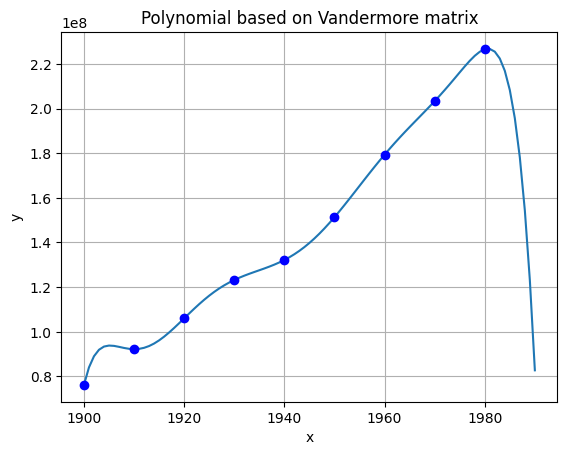

In [7]:
# Polynomial plot
arguments = range(1900,1991)
values = np.array([horner_scalar(phi_4(t, 2), c) for t in arguments])
plt.plot(arguments, values)
plt.plot(year, population, 'bo')
plt.title("Polynomial based on Vandermore matrix")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [83]:
# Extrapolation
extrapolated_value = values[-1]
real_value = 248709873
relative_error = np.abs(extrapolated_value-real_value)/real_value
print(relative_error)

0.6672864651416454


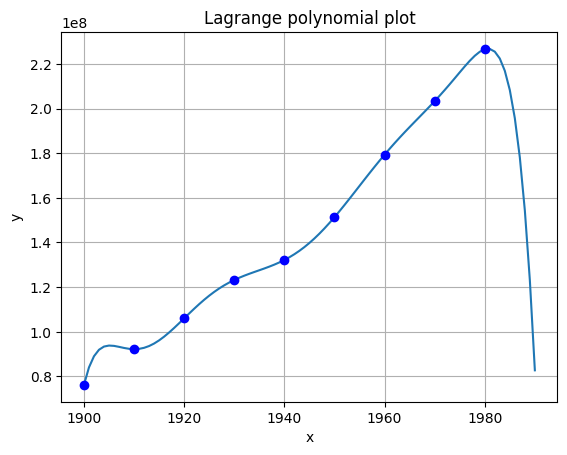

In [84]:
# Lagrange interpolation polynomial
l = lambda t, j: np.prod(t-year[year!=year[j]])/np.prod(year[j]-year[year!=year[j]])
p_8 = lambda t: np.sum([population[j] * l(t, j) for j in range(9)])

# Lagrange polynomial plot
arguments = range(1900,1991)
values = np.array([p_8(t) for t in arguments])
plt.plot(arguments, values)
plt.plot(year, population, 'bo')
plt.title("Lagrange polynomial plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

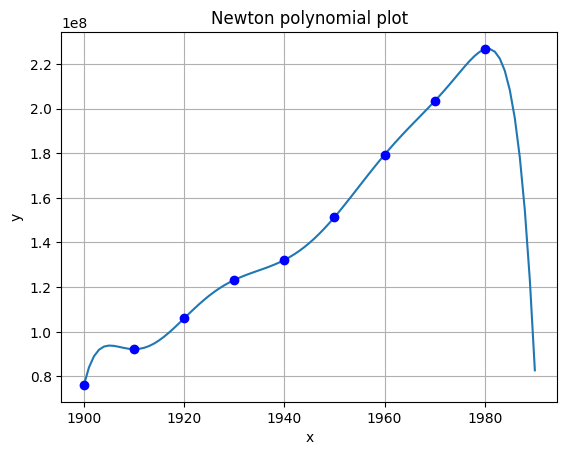

In [85]:
#Newton basis functions
pi = lambda t, j: np.prod(t-year[year<year[j]])

# Newton's divided differences interpolation polynomial
def x(i, j):
    if i == j: return population[i]
    return (x(i+1, j) - x(i, j-1))/(year[j] - year[i])
X = [x(0, i) for i in range(9)]
p_8 = lambda t: np.sum([X[j] * pi(t, j) for j in range(9)])

def horner_vector(base, coefficients):
    n = len(coefficients) - 1
    W = coefficients[-1]
    for i in range(n-1, -1, -1):
        W = W*base[i] + coefficients[i]
    return W

# Newton polynomial plot
arguments = range(1900,1991)
values = np.array([horner_vector(t-year, X) for t in arguments])
plt.plot(arguments, values)
plt.plot(year, population, 'bo')
plt.title("Newton polynomial plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

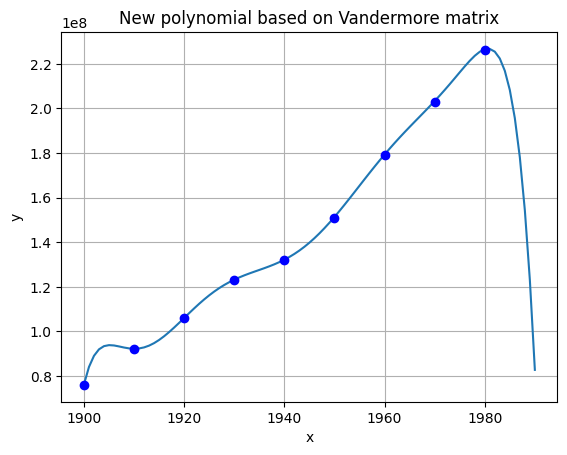

In [86]:
population = population - population%10**6 
c_new = scipy.linalg.solve(V_4, population)
# print(c)
# print(c_new)
# New polynomial plot
arguments = range(1900,1991)
values = np.array([horner_scalar(phi_4(t, 2), c) for t in arguments])
plt.plot(arguments, values)
plt.plot(year, population, 'bo')
plt.title("New polynomial based on Vandermore matrix")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()